In [9]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [10]:
class Image(object):
    def __init__(self,path):
        self.path=path
        self.bgr_img=None
        self.rgb_img=None
        self.gray_img=None

    def rgb(self,return_img=False):
        ''' Convert to RGB'''
        self.rgb_img=cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2RGB)
        if return_img:
            return self.rgb_img


    def gray(self,return_img=False):
        ''' Convert to RGB'''
        self.gray_img=cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_img

    def show(self,img,title='Image',cv2_show=False):
        if cv2_show:
            cv2.imshow(str(title),img)
        else:
            if len(img.shape) !=3:
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
        plt.title(str(title))
        plt.show()

    def show_all(self,imgs_list,titles_list):
        plt.figure(figsize=[20,10])
        assert len(imgs_list) == len(titles_list),"Houston we've got a problem"
        N=len(imgs_list)
        for i,(img,title) in enumerate(zip(imgs_list,titles_list)):
            plt.subplot(1,N,i+1)
            if len(img.shape) !=3:
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
            plt.title(str(title))
        plt.show()

    def read_image(self,return_img=False):
        '''Read image from directory,
         Remember the image read with cv2 and it will be BGR '''
        try:
            self.bgr_img=cv2.imread(str(self.path))
            if return_img:
                return self.bgr_img
        except Exception as e:
            raise Exception('oops! something went worng')





מציאת המיקום של מרכז מטריצת הקרנל.


# **get_mid_kernel**
## Parmaters
*   kernel - The kernel to be used

## Logic
The function find the central index of the kernel
## Return

 The position [row,col] of the middle




In [11]:
import math
def get_mid_kernel(kernel):
    i,j=kernel.shape
    i=math.floor(i/2)
    j=math.floor(j/2)
    return i,j
  

פעולה כפל מטריצות
שורות-הטווח של השורות במטריצת התמונה
עמודות- הטווח של העמודות בתמונה
אם ערך של תמונה במקום שורה עמודה לא נמצא אזי ערכו אפס(במקום לרפד באפסים)

# **matrix_multiplication**
## Parmaters
*   image - The image to be used (both gray or color).
*   rows - Range of rows.
*   cols - Range of columns.
*   kernel - The kernel to be used.


## Logic
The function calculate convolution of the mini matrix that is defined by the rows indexes and columns.
*    if cell does'nt exisit his value is set to be 0.
     insetd of padding the original matrix with zeros i checked if part of        the mini matrix is out of bounding.
     
## Return

The result of convolution calculate.



In [16]:

def matrix_multiplication(image,rows,cols,kernel):
    
    val_list=[]
    for i,row in enumerate(rows):
        for j,col in enumerate(cols):
            try:
                val_list.append(image[row][col]*kernel[i][j])
            except IndexError:
                val_list.append(0)
    return np.sum(val_list)


עבור כל פיקסל של התמונה המקורית הפונקציה מוצאת את הטווח של המטריצה עבורה תחושב הקונובלציה
הפונקציה מחזירה את המטריצה לאחר הקונבולציה

# **convol2d**
## Parmaters
*   image - The image to be used.
*   kernel - The kernel to be used.


## Logic
The function calculate convolution for each pixle.
It finds the indexes boundary of the matrix that surrounds is it     
## Return

The result of convolution calculate.



In [12]:
def convol2d(image,kernel):
    lenght,width=image.shape
    output=np.zeros_like(image)
    k_mid_i,k_mid_j=get_mid_kernel(kernel)
    for i in np.arange(lenght):
        for j in np.arange(width):
            mini_mat_i=np.arange(i-k_mid_i,i+k_mid_i)
            mini_mat_j=np.arange(j-k_mid_j,j+k_mid_j)
            val=matrix_multiplication(image,mini_mat_i,mini_mat_j,kernel)
            output[i][j]=val
    return output



פונקציית מיון לטיפול בתמונות אפורות או צבעיוניות

# **dimension**
## Parmaters
*   image - The image to be used (gray or color).
*   kernel - The kernel to be used.


## Logic
The function checks the namber of dimension for given image.
## Return

The result of convolution calculate.



In [13]:
def dimension(image,kernel):
    
    if len(image.shape) != 2:
        output=np.zeros_like(image)
        for dim in range(image.shape[2]):
            output[:,:,dim] = convol2d(image[:,:,dim],kernel)
    else:
          output=convol2d(image,kernel)

    return output
    



# Image class

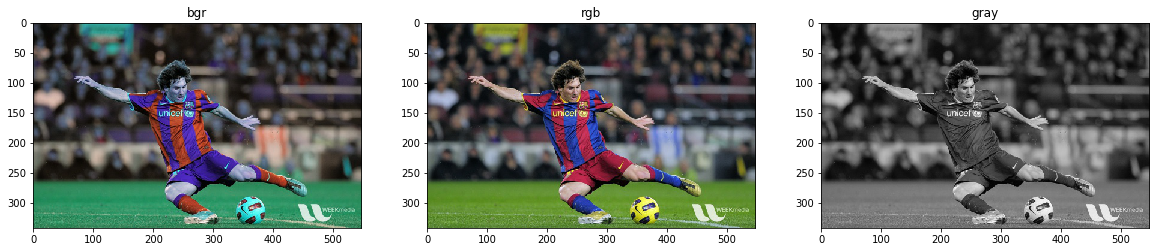

In [14]:
img=Image('messi.jpg')
bgr=img.read_image(return_img=True)
rgb=img.rgb(return_img=True)
gray=img.gray(return_img=True)
img.show_all([bgr,rgb,gray],['bgr','rgb','gray'])


# convolution on gray image

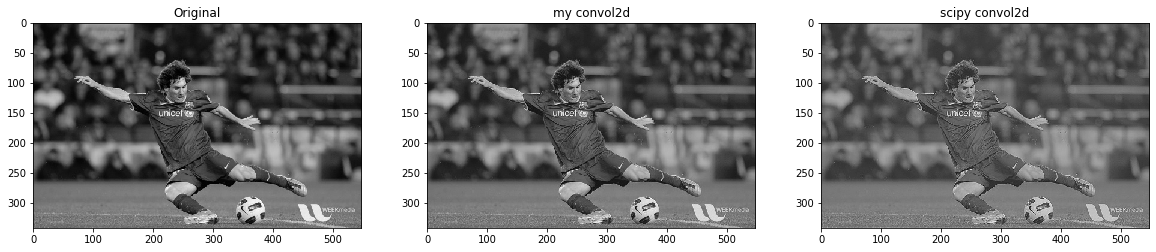

In [17]:
img=Image('messi.jpg')
bgr=img.read_image(return_img=True)
gray=img.gray(return_img=True)

kernel=np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4
image_equalized=gray/np.max(np.abs(rgb))
image_kernel=dimension(image_equalized,kernel)
plt.figure(figsize=[20,10])

plt.subplot(131)
plt.imshow(image_equalized,cmap=plt.cm.gray)
plt.title('Original')


plt.subplot(132)
plt.imshow(image_kernel,cmap=plt.cm.gray)
plt.title('my convol2d')

import scipy.signal
image_kernel_sci=scipy.signal.convolve2d(gray,kernel,'same')
plt.subplot(133)
plt.imshow(image_kernel_sci,cmap=plt.cm.gray)
plt.title('scipy convol2d')

plt.show()


# Convolution on color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


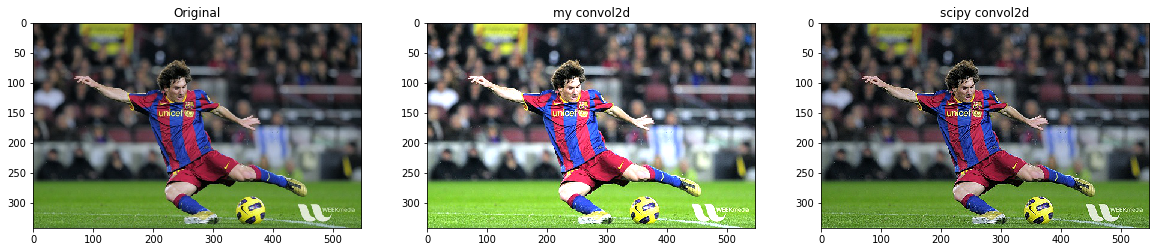

In [18]:


kernel=np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4

image_equalized=rgb/np.max(np.abs(rgb))

image_kernel=dimension(image_equalized,kernel)

plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized)
plt.title('Original')



plt.subplot(132)
plt.imshow(image_kernel)
plt.title('my convol2d')



import scipy.signal
image_kernel_sci = np.zeros_like(image_equalized)
for dim in range(rgb.shape[2]):
    image_kernel_sci[:,:,dim] = scipy.signal.convolve2d(image_equalized[:,:,dim], kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel_sci)
plt.title('scipy convol2d')

plt.show()

